# Load Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('application_test.csv')
df1.sample(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
31762,331082,Cash loans,M,Y,Y,2,265500.0,1563840.0,64669.5,1350000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0
36156,364547,Cash loans,F,Y,N,0,315000.0,790830.0,62613.0,675000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
35189,357342,Cash loans,F,N,Y,0,112500.0,296280.0,23539.5,225000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,5.0
45625,433596,Cash loans,F,N,Y,1,108000.0,311877.0,16051.5,252000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,3.0
20563,249149,Cash loans,M,N,Y,0,157500.0,583425.0,31779.0,436500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
df2 = pd.read_csv('application_train.csv')
df2.sample(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
246349,385096,0,Cash loans,M,N,Y,0,256050.0,495000.0,19629.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,2.0
276616,420544,0,Cash loans,M,Y,N,0,90000.0,513531.0,38524.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
274206,417826,0,Cash loans,F,N,Y,0,90000.0,879480.0,28498.5,...,0,0,0,0,0.0,0.0,0.0,0.0,2.0,4.0
225659,361377,0,Cash loans,F,N,Y,0,90000.0,468000.0,15228.0,...,0,0,0,0,0.0,0.0,0.0,4.0,0.0,4.0
74571,186475,0,Cash loans,F,N,Y,0,69300.0,270000.0,11569.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


# Overview

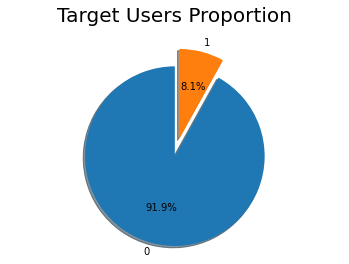

In [4]:
dg = df2.groupby(['TARGET']).agg({'SK_ID_CURR':'count'})
dg = dg.reset_index()
dg.columns = ['TARGET', 'JUMLAH']

fig, ax = plt.subplots()
ax.pie(dg['JUMLAH'], explode=[0, 0.2], labels=dg['TARGET'], autopct='%1.1f%%',
        shadow=True, startangle=90)
ax.axis('equal')
plt.title('Target Users Proportion', fontsize=20, y=1.05)
plt.show()

# Pre-Processing

### Handling Missing Value

In [5]:
for i in df2.columns:
    percent = round(df2[i].isna().sum()*100/len(df2[i]),2)
    if df2[i].isnull().sum() > 0:
        print(f'''Kolom {i}:''')
        print('Missing values :',df2[i].isna().sum(),'dari ',len(df2))
        print(f'''Presentase missing value:''',percent, '%')
        print()

Kolom AMT_ANNUITY:
Missing values : 12 dari  307511
Presentase missing value: 0.0 %

Kolom AMT_GOODS_PRICE:
Missing values : 278 dari  307511
Presentase missing value: 0.09 %

Kolom NAME_TYPE_SUITE:
Missing values : 1292 dari  307511
Presentase missing value: 0.42 %

Kolom OWN_CAR_AGE:
Missing values : 202929 dari  307511
Presentase missing value: 65.99 %

Kolom OCCUPATION_TYPE:
Missing values : 96391 dari  307511
Presentase missing value: 31.35 %

Kolom CNT_FAM_MEMBERS:
Missing values : 2 dari  307511
Presentase missing value: 0.0 %

Kolom EXT_SOURCE_1:
Missing values : 173378 dari  307511
Presentase missing value: 56.38 %

Kolom EXT_SOURCE_2:
Missing values : 660 dari  307511
Presentase missing value: 0.21 %

Kolom EXT_SOURCE_3:
Missing values : 60965 dari  307511
Presentase missing value: 19.83 %

Kolom APARTMENTS_AVG:
Missing values : 156061 dari  307511
Presentase missing value: 50.75 %

Kolom BASEMENTAREA_AVG:
Missing values : 179943 dari  307511
Presentase missing value: 58.52 %

In [6]:
for i in df2.columns:
    percent = round(df2[i].isna().sum()*100/len(df2[i]),2)
    if percent > 0.25:
        df2 = df2.drop([i],axis=1)

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 60 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [7]:
df2.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df2['AMT_ANNUITY'].fillna(df2['AMT_ANNUITY'].median(), inplace=True)
df2['AMT_GOODS_PRICE'].fillna(df2['AMT_GOODS_PRICE'].median(), inplace=True)
df2['CNT_FAM_MEMBERS'].fillna(df2['CNT_FAM_MEMBERS'].median(), inplace=True)
df2['EXT_SOURCE_2'].fillna(df2['EXT_SOURCE_2'].median(), inplace=True)
df2['DAYS_LAST_PHONE_CHANGE'].fillna(df2['DAYS_LAST_PHONE_CHANGE'].median(), inplace=True)

In [9]:
df2.isna().any()

SK_ID_CURR                     False
TARGET                         False
NAME_CONTRACT_TYPE             False
CODE_GENDER                    False
FLAG_OWN_CAR                   False
FLAG_OWN_REALTY                False
CNT_CHILDREN                   False
AMT_INCOME_TOTAL               False
AMT_CREDIT                     False
AMT_ANNUITY                    False
AMT_GOODS_PRICE                False
NAME_INCOME_TYPE               False
NAME_EDUCATION_TYPE            False
NAME_FAMILY_STATUS             False
NAME_HOUSING_TYPE              False
REGION_POPULATION_RELATIVE     False
DAYS_BIRTH                     False
DAYS_EMPLOYED                  False
DAYS_REGISTRATION              False
DAYS_ID_PUBLISH                False
FLAG_MOBIL                     False
FLAG_EMP_PHONE                 False
FLAG_WORK_PHONE                False
FLAG_CONT_MOBILE               False
FLAG_PHONE                     False
FLAG_EMAIL                     False
CNT_FAM_MEMBERS                False
R

### Handling Duplicated Data

In [10]:
df2.duplicated().any()

False

### Feature Encoding

In [11]:
df3 = df2.copy()

mapping_contract = {'Cash loans':0, 'Revolving loans':1}
df3['NAME_CONTRACT_TYPE'] = df3['NAME_CONTRACT_TYPE'].map(mapping_contract)

mapping_car = {'N':0, 'Y':1}
df3['FLAG_OWN_CAR'] = df3['FLAG_OWN_CAR'].map(mapping_car)

mapping_house = {'N':0, 'Y':1}
df3['FLAG_OWN_REALTY'] = df3['FLAG_OWN_REALTY'].map(mapping_house)

mapping_education = {'Lower secondary':0, 'Secondary / secondary special':1, 'Incomplete higher':2, 'Higher education':3, 'Academic degree':4}
df3['NAME_EDUCATION_TYPE'] = df3['NAME_EDUCATION_TYPE'].map(mapping_education)

In [12]:
for i in ['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']:
    onehots = pd.get_dummies(df3[i], prefix=i)
    df3 = df3.join(onehots)

In [13]:
df3 = df3.drop(columns=['CODE_GENDER', 'NAME_INCOME_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'])

In [14]:
df3.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
0,100002,1,0,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,0,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0,0,0,0,0,0


### Feature Transformation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

df4 = df3.copy()
X = df4.drop(['TARGET'], axis=1)
y = df4['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

for i in X.columns:
    scaler = MinMaxScaler().fit(X_train[[i]])
    X_train[i] = scaler.transform(X_train[[i]])
    X_test[i] = scaler.transform(X_test[[i]])
    
X_train.insert(loc=1, column='TARGET', value=y_train)
X_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,ORGANIZATION_TYPE_Trade: type 4,ORGANIZATION_TYPE_Trade: type 5,ORGANIZATION_TYPE_Trade: type 6,ORGANIZATION_TYPE_Trade: type 7,ORGANIZATION_TYPE_Transport: type 1,ORGANIZATION_TYPE_Transport: type 2,ORGANIZATION_TYPE_Transport: type 3,ORGANIZATION_TYPE_Transport: type 4,ORGANIZATION_TYPE_University,ORGANIZATION_TYPE_XNA
232786,0.756812,0,0.0,0.0,1.0,0.052632,0.000819,0.118243,0.087926,0.105499,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
67196,0.218736,0,0.0,0.0,0.0,0.000000,0.000935,0.057747,0.080590,0.049383,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
194426,0.632835,0,0.0,0.0,1.0,0.000000,0.003243,0.236063,0.121867,0.203143,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
103804,0.338169,0,1.0,0.0,0.0,0.105263,0.000742,0.050562,0.041962,0.051627,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100839,0.328628,0,0.0,0.0,1.0,0.000000,0.000358,0.310449,0.141120,0.270483,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Select Top 10 Features

In [16]:
from sklearn.feature_selection import SelectKBest, chi2

feature_selection = SelectKBest(chi2, k=11)
df4 = pd.DataFrame(feature_selection.fit_transform(X_train, y_train))
df4.columns = df3.columns[feature_selection.get_support()]
df4.head()

,TARGET,DAYS_EMPLOYED,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_2,CODE_GENDER_F,CODE_GENDER_M,NAME_INCOME_TYPE_Pensioner,NAME_INCOME_TYPE_Working,ORGANIZATION_TYPE_XNA
0,0.0,0.046143,0.0,0.0,0.0,0.706904,1.0,0.0,0.0,0.0,0.0
1,0.0,0.007052,0.0,0.0,0.0,0.749893,1.0,0.0,0.0,0.0,0.0
2,0.0,0.044275,0.0,0.0,0.0,0.622719,0.0,1.0,0.0,0.0,0.0
3,0.0,0.041636,0.0,0.0,0.0,0.817852,1.0,0.0,0.0,1.0,0.0
4,0.0,0.046428,0.0,0.0,0.0,0.717877,1.0,0.0,0.0,1.0,0.0


### Class Imbalance

In [17]:
from imblearn import over_sampling

X = df4.drop(['TARGET'], axis=1)
y = df4['TARGET']
X_train_smote, y_train_smote = over_sampling.SMOTE(random_state=3).fit_resample(X, y)

In [18]:
print('Target sebelum oversampling:')
print(pd.Series(y).value_counts())

Target sebelum oversampling:
0.0    226201
1.0     19807
Name: TARGET, dtype: int64


In [19]:
print('Target setelah oversampling:')
print(pd.Series(y_train_smote).value_counts())

Target setelah oversampling:
0.0    226201
1.0    226201
Name: TARGET, dtype: int64


# Data Visualization and Business Insight

<AxesSubplot:>

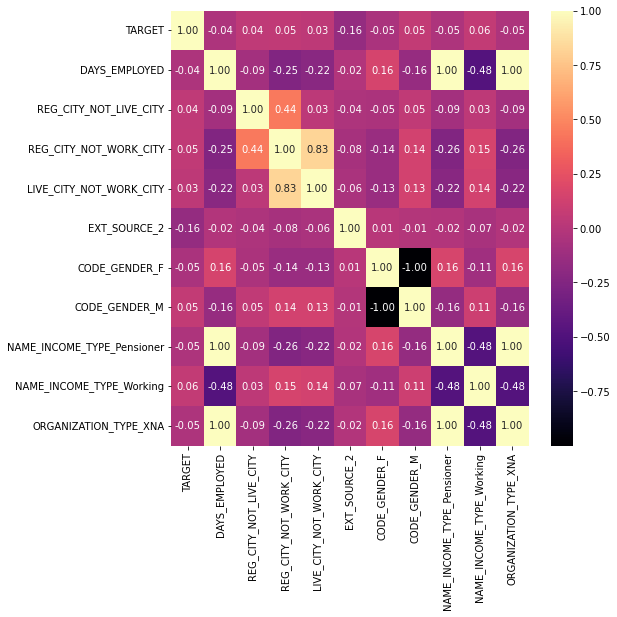

In [20]:
df5 = df3[df4.columns].copy()
plt.figure(figsize=(8,8))
sns.heatmap(df5.corr(), cmap='magma', annot=True, fmt='.2f')

Text(0.5, 1.0, 'Target Berdasarkan Tipe Kontrak')

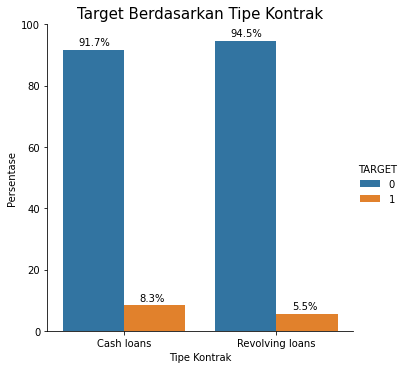

In [21]:
dg = df2.groupby('NAME_CONTRACT_TYPE')['TARGET'].value_counts(normalize=True)
dg = dg.mul(100).rename('Percent').reset_index()
graph = sns.catplot(x='NAME_CONTRACT_TYPE', y='Percent', hue='TARGET', kind='bar', data=dg)
for i in graph.ax.patches:
    txt = str(i.get_height().round(1)) + '%'
    txt_x = i.get_x() + 0.1
    txt_y = i.get_height() + 1.5
    graph.ax.text(txt_x,txt_y,txt)
graph.ax.set_ylim(0,100)
plt.xlabel('Tipe Kontrak')
plt.ylabel('Persentase')
plt.title('Target Berdasarkan Tipe Kontrak', fontsize=15)

Text(0.5, 1.05, 'Target Berdasarkan Gender')

posx and posy should be finite values
posx and posy should be finite values


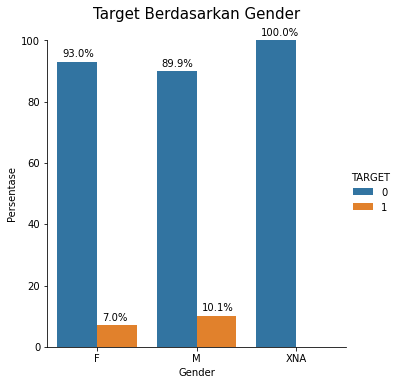

In [22]:
dg = df2.groupby('CODE_GENDER')['TARGET'].value_counts(normalize=True)
dg = dg.mul(100).rename('Percent').reset_index()
graph = sns.catplot(x='CODE_GENDER', y='Percent', hue='TARGET', kind='bar', data=dg)
for i in graph.ax.patches:
    txt = str(i.get_height().round(1)) + '%'
    txt_x = i.get_x() + 0.05
    txt_y = i.get_height() + 1.5
    graph.ax.text(txt_x,txt_y,txt)
graph.ax.set_ylim(0,100)
plt.xlabel('Gender')
plt.ylabel('Persentase')
plt.title('Target Berdasarkan Gender', fontsize=15, y=1.05)

Text(0.5, 1.05, 'Target Berdasarkan Tipe Income')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


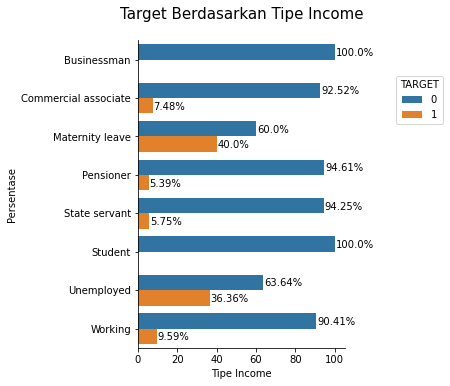

In [23]:
dg = df2.groupby('NAME_INCOME_TYPE')['TARGET'].value_counts(normalize=True)
dg = dg.mul(100).rename('Percent').reset_index()

graph = sns.catplot(x='Percent', y='NAME_INCOME_TYPE', hue='TARGET', kind='bar', data=dg, orient='h', legend=False)
for i in graph.ax.patches:
    plt.text(i.get_width()+0.5, i.get_y()+0.3, str(round((i.get_width()),2)) + '%', fontsize=10)
plt.xlabel('Tipe Income')
plt.ylabel('Persentase')
plt.legend(bbox_to_anchor=(1.5, 0.9), title='TARGET')
plt.title('Target Berdasarkan Tipe Income', fontsize=15, y=1.05)

# Modeling and Evaluation

In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(X_test[X.columns])
    y_pred_train = model.predict(X_train_smote)
    y_pred_proba = model.predict_proba(X_test[X.columns])
    y_pred_proba_train = model.predict_proba(X_train_smote)
    
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))
    
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train_smote, y_pred_proba_train[:, 1]))

    score = cross_validate(model, X, y, cv=5, scoring='roc_auc', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
dt = DecisionTreeClassifier(random_state=3)
dt.fit(X_train_smote, y_train_smote)
eval_classification(dt)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.10
Recall (Test Set): 0.36
F1-Score (Test Set): 0.16
roc_auc (test-proba): 0.54
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9999614381928268
roc_auc (crossval test): 0.5191322929415232


### Logistic Regression

In [26]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(random_state=3)
logreg.fit(X_train_smote, y_train_smote)
eval_classification(logreg)

Accuracy (Test Set): 0.66
Precision (Test Set): 0.13
Recall (Test Set): 0.59
F1-Score (Test Set): 0.22
roc_auc (test-proba): 0.68
roc_auc (train-proba): 0.68
roc_auc (crossval train): 0.6757182386689252
roc_auc (crossval test): 0.6755580658382478


### ADABoost

In [27]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(random_state=3)
ada.fit(X_train_smote, y_train_smote)
eval_classification(ada)

Accuracy (Test Set): 0.64
Precision (Test Set): 0.13
Recall (Test Set): 0.61
F1-Score (Test Set): 0.22
roc_auc (test-proba): 0.68
roc_auc (train-proba): 0.69
roc_auc (crossval train): 0.6842288087844275
roc_auc (crossval test): 0.6807612661882223


### Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=3)
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test[X.columns])
y_pred_proba = rf.predict_proba(X_test[X.columns])
eval_classification(rf)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.11
Recall (Test Set): 0.38
F1-Score (Test Set): 0.17
roc_auc (test-proba): 0.58
roc_auc (train-proba): 1.00
roc_auc (crossval train): 0.9994030999304753
roc_auc (crossval test): 0.5975888411614501


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.73      0.82     56485
           1       0.11      0.38      0.17      5018

    accuracy                           0.70     61503
   macro avg       0.52      0.55      0.49     61503
weighted avg       0.86      0.70      0.77     61503



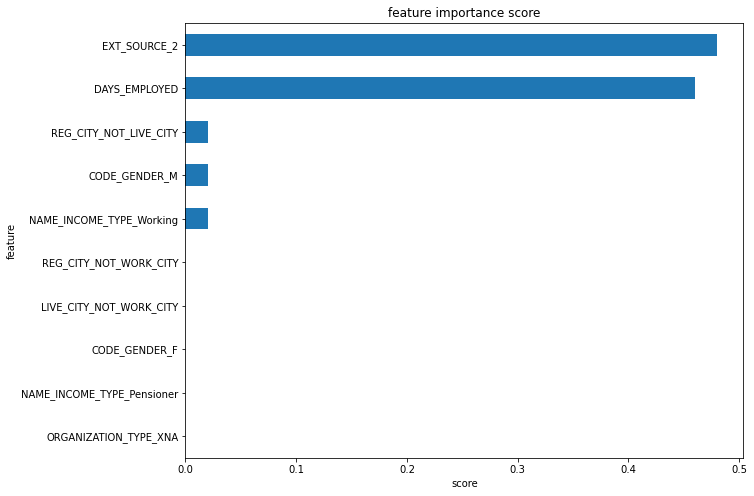

In [32]:
show_feature_importance(ada)

In [33]:
pip install shap